In [202]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df=pd.read_excel("Rent.xlsx")
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [203]:
df.tail()

,area,rent
55,3100,54000
56,2750,48500
57,1800,25100
58,2200,31560
59,3100,51600


In [204]:
df.head(7)

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100
5,1900,32500
6,1500,20000


In [205]:
df[5:11]

,area,rent
5,1900,32500
6,1500,20000
7,1850,24500
8,2700,48000
9,2100,31000
10,2150,34500


In [206]:
df['rent'].head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

In [207]:
df.mean()

area     2289.000000
rent    37269.166667
dtype: float64

In [208]:
df.area.mean()

np.float64(2289.0)

In [209]:
df.rent[5:11]

5     32500
6     20000
7     24500
8     48000
9     31000
10    34500
Name: rent, dtype: int64

In [210]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


In [211]:
df.area.std()

np.float64(538.8805093801691)

In [212]:
df.shape

(60, 2)

In [213]:
row,col = df.shape

In [214]:
row

60

In [215]:
col

2

In [216]:
df.isnull().sum()

area    0
rent    0
dtype: int64

In [217]:
x= df[['area']]

In [218]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [219]:
y=df['rent']

In [220]:
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

In [221]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest= tts(x,y,test_size=0.3,random_state=42)

In [222]:
xtrain.head()

,area
40,2150
4,3000
43,2510
19,2700
34,3000


In [223]:
xtest.head()

,area
0,2000
5,1900
36,1500
45,3100
13,2510


In [224]:
from sklearn.linear_model import LinearRegression 

In [225]:
reg=LinearRegression()

In [226]:
reg.fit(xtrain,ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [227]:
m=reg.coef_

In [228]:
m

array([20.68636687])

In [229]:
c=reg.intercept_

In [230]:
c

np.float64(-10252.90474033673)

In [231]:
reg.predict([[2100]])
import warnings
warnings.filterwarnings("ignore")

In [232]:
reg.predict(xtest)

array([31119.82900279, 29051.19231563, 20776.64556701, 53874.83256151,
       41669.87610729, 47668.92250004, 36291.42072068, 26982.55562848,
       33188.46568994, 26982.55562848, 26982.55562848, 33395.32935866,
       33188.46568994, 36291.42072068, 62149.37931013, 21810.96391059,
       45600.28581288, 20776.64556701])

In [233]:
df['predict result']=reg.predict(x)

In [234]:
df.head()

,area,rent,predict result
0,2000,31500,31119.829003
1,2100,35000,33188.465690
2,2500,41050,41463.012439
3,2250,36100,36291.420721
4,3000,52100,51806.195874


In [235]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
pred= reg.predict(xtest)

In [236]:
mse = mean_squared_error(ytest, pred)
mae = mean_absolute_error(ytest, pred)


In [237]:
mse

7677066.248378809

In [238]:
mae

2103.50832336242

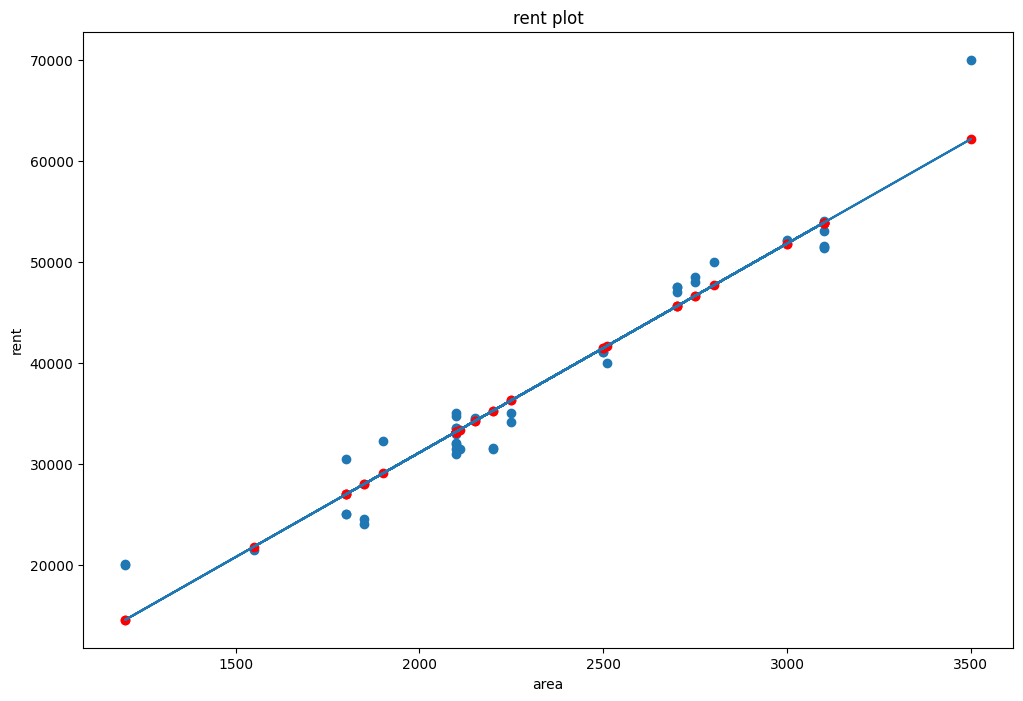

In [239]:
plt.figure(figsize=(12,8))
plt.xlabel("area")
plt.ylabel("rent")
plt.title("rent plot")
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,reg.predict(xtrain))
plt.scatter(xtrain,reg.predict(xtrain),color="red")

In [240]:
from sklearn.metrics import r2_score

In [241]:
r2_score(ytest,pred)

0.9515542918540623

In [242]:
xtest.to_csv("xtest.csv")

In [243]:
import pickle as pk
import joblib as jb
pk.dump(reg,open("first","wb"))

In [244]:
reg2=pk.load(open("first","rb"))
reg2.predict([[2100]])
import warnings
warnings.filterwarnings("ignore")

In [245]:
import warnings
warnings.filterwarnings("ignore")
jb.dump(reg,"second")

['second']

In [246]:
reg3=jb.load("second")

In [247]:
reg3.predict([[2300]])

array([37325.73906426])

In [248]:
import gradio as gr
def rent_recom(x):
 rent= reg3.predict([[x]])
 return float(rent[0])

In [249]:
rent_recom(3000)

51806.19587435103

In [250]:
interface=gr.Interface(
    fn=rent_recom,
    inputs=['number'],
    outputs=['number']).launch(share=False)

* Running on local URL:  http://127.0.0.1:7863
* To create a public link, set `share=True` in `launch()`.
